# Exercise 2: Part F

In this exercise we will use more randomly generated data and fit models to it.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


## Task F1: Data Generation

Use [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create a vector _X_, containing 100 observations drawn from a $N(0, 1)$ distribution.

Use the same function to create a vector _eps_ ($\epsilon$), containing 100 observations drawn from a $N(0, 0.25)$ distribution - a normal distribution with a mean and variance of 0.25.

Using _X_ and _eps_, generate a vector y:

$$Y = -1 + 0.5X + \epsilon$$

In [2]:
x = np.random.normal(0,1,100)
x

array([ 6.25246665e-01, -2.46470756e-01, -9.19313015e-01, -1.28972965e+00,
       -8.46324610e-01,  1.70108980e+00, -1.73819700e+00,  1.34555584e-01,
        1.04973677e+00,  9.33347611e-01, -3.32804244e-01,  2.33057162e+00,
       -1.85631696e-01, -6.05872527e-01,  8.41793551e-01,  5.55052322e-01,
        7.94264102e-02, -1.41345066e+00, -3.72892368e-01, -5.38709932e-01,
        2.47479102e-01,  2.86720573e-01, -5.36603091e-01, -1.91949614e+00,
        5.82966809e-02, -7.58071398e-02, -5.68275917e-01,  7.48956171e-01,
        1.19560456e-01, -2.57917609e-02, -2.20340696e-01, -5.34875167e-01,
       -5.97783194e-01, -1.54605022e-03, -6.28760245e-01, -9.79063208e-01,
       -5.17986157e-01, -8.82831329e-01, -3.63384518e-03, -8.02824005e-01,
       -5.71612747e-01,  3.20419271e-01, -1.30695182e+00,  1.40067003e+00,
       -6.92204203e-01,  1.40891470e+00, -2.37092267e-02, -3.32580829e-02,
        8.98730866e-01,  6.25636664e-01,  8.51480554e-01,  1.97885780e+00,
        5.05324015e-01,  

In [3]:
eps = np.random.normal(0,0.25,100)
eps

array([-0.10523607,  0.26810607, -0.29077502,  0.08638318,  0.0628658 ,
        0.16760635, -0.22009868, -0.06812932, -0.01545227, -0.22671209,
        0.36588643, -0.02523726,  0.03690004, -0.03334365, -0.10620741,
       -0.06746878, -0.07410166,  0.03653481, -0.18072243,  0.09823513,
        0.1301402 , -0.11389313,  0.00550272, -0.24586762,  0.32529627,
       -0.14960582, -0.31314158, -0.02347783,  0.27079895,  0.28173824,
        0.02503629,  0.04041781, -0.20014073,  0.00648799, -0.01156289,
        0.16636336,  0.10464681, -0.29473487, -0.01516876,  0.17777971,
        0.19019075, -0.26555861,  0.46472283, -0.0701052 , -0.22820116,
       -0.3861335 , -0.0614313 , -0.02393297,  0.22812336, -0.46765621,
       -0.31348098, -0.08178005, -0.36014205, -0.11845661,  0.05204285,
        0.00778319,  0.0690058 ,  0.1345191 , -0.12471789, -0.05770028,
        0.07901559,  0.08846582,  0.18724285,  0.01884687, -0.07786553,
       -0.32952921,  0.2108616 ,  0.22730228, -0.36815682,  0.24

In [6]:
y = -1 + 0.5 * x + eps
y

array([-0.79261273, -0.85512931, -1.75043152, -1.55848164, -1.36029651,
        0.01815125, -2.08919718, -1.00085152, -0.49058389, -0.76003828,
       -0.80051569,  0.14004855, -1.05591581, -1.33627991, -0.68531063,
       -0.78994262, -1.03438846, -1.67019052, -1.36716861, -1.17111984,
       -0.74612025, -0.97053284, -1.26279883, -2.20561569, -0.64555539,
       -1.18750939, -1.59727954, -0.64899974, -0.66942083, -0.73115765,
       -1.08513405, -1.22701977, -1.49903232, -0.99428504, -1.32594301,
       -1.32316824, -1.15434626, -1.73615054, -1.01698568, -1.22363229,
       -1.09561563, -1.10534897, -1.18875308, -0.36977019, -1.57430326,
       -0.68167615, -1.07328591, -1.04056201, -0.32251121, -1.15483788,
       -0.8877407 , -0.09235115, -1.10748004, -1.04443635, -0.31491003,
       -0.82045983, -1.47341471, -0.78812357, -0.83268418, -1.55094077,
       -2.13883681, -0.50267604, -0.6845541 , -1.68546427, -1.12305132,
       -1.44194975, -0.78287689, -0.82148789, -1.17751576, -0.42

## Task F2: Data Analysis I

Create a scatterplot displaying the relationship between x and y (Use the data you generated in the previous task).

<AxesSubplot:>

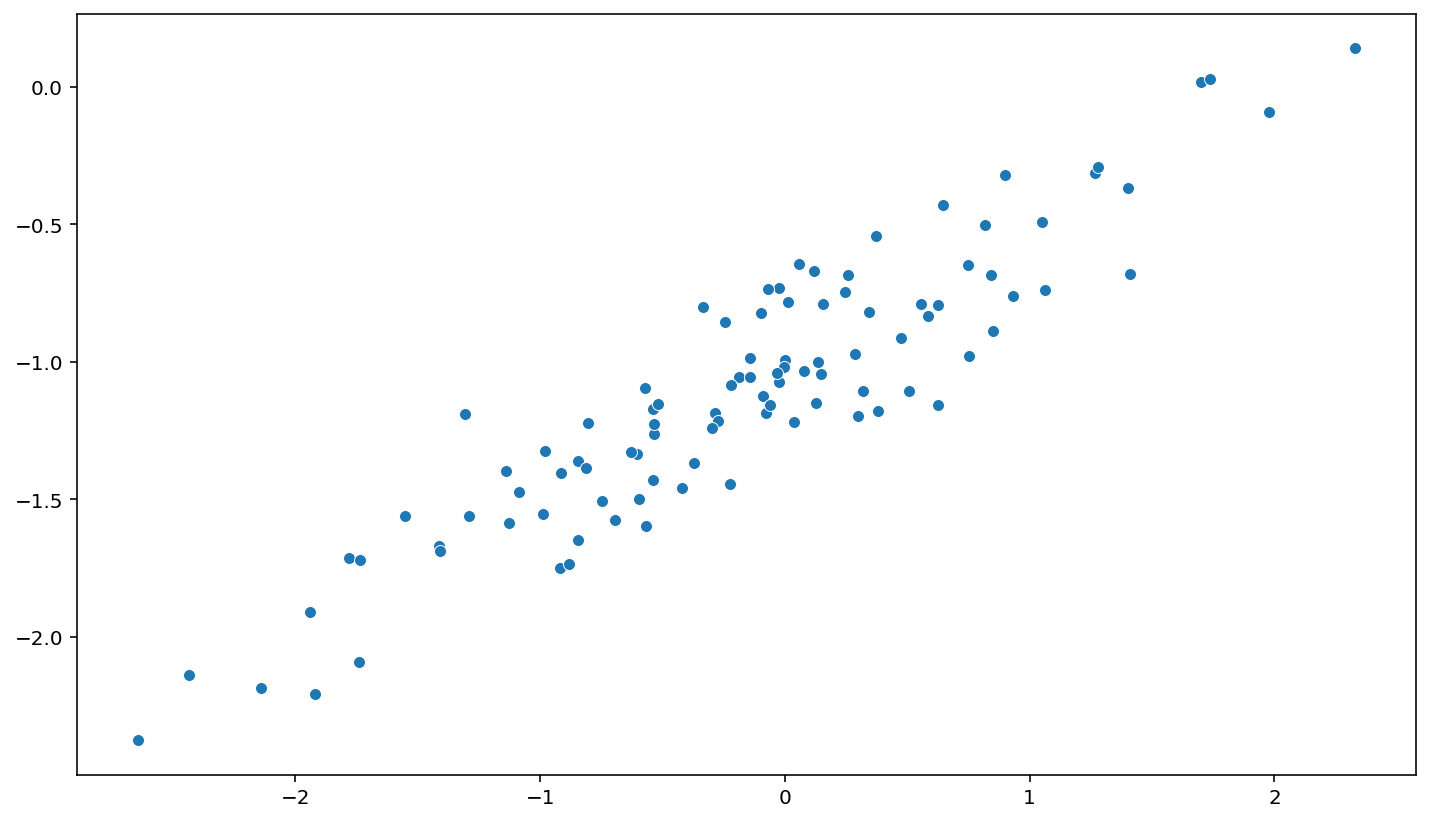

In [7]:
sns.scatterplot(x=x, y=y)

## Task F3: Data Analysis II

Fit a least squares linear model to predict y using x. How do $\beta_0'$ and $\beta_1'$ compare to $\beta_0$ and $\beta_1$?

In [11]:
import pandas as pd
df = pd.DataFrame()
df["X"] = x
df["Y"] = y
df["eps"] = eps
df.describe()

,X,Y,eps
count,100.000000,100.000000,100.000000
mean,-0.168910,-1.108136,-0.023681
std,0.953078,0.490440,0.192372
min,-2.643366,-2.373960,-0.467656
25%,-0.760841,-1.410003,-0.149439
50%,-0.093976,-1.115266,-0.022718
75%,0.373527,-0.789488,0.099838
max,2.330572,0.140049,0.464723


In [12]:
ls = smf.ols(formula="y ~ x",data=df).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     549.7
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           5.68e-42
Time:                        10:50:48   Log-Likelihood:                 24.274
No. Observations:                 100   AIC:                            -44.55
Df Residuals:                      98   BIC:                            -39.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0281      0.019    -52.785      0.000      -1.067      -0.989
x              0.4741      0.020     23.445      0.000       0.434       0.514
==============================================================================
Omnibus:                        2.032   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.460
Skew:                           0.039   Prob(JB):                        0.482
Kurtosis:                       2.413   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>Beta0' = -1.0281 and Beta1' = 0.4741 - therefore the predications are decent</strong>

## Task F4: Data Analysis III

Create a scatterplot of your generated data. Then plot the least squares line and the regression line.

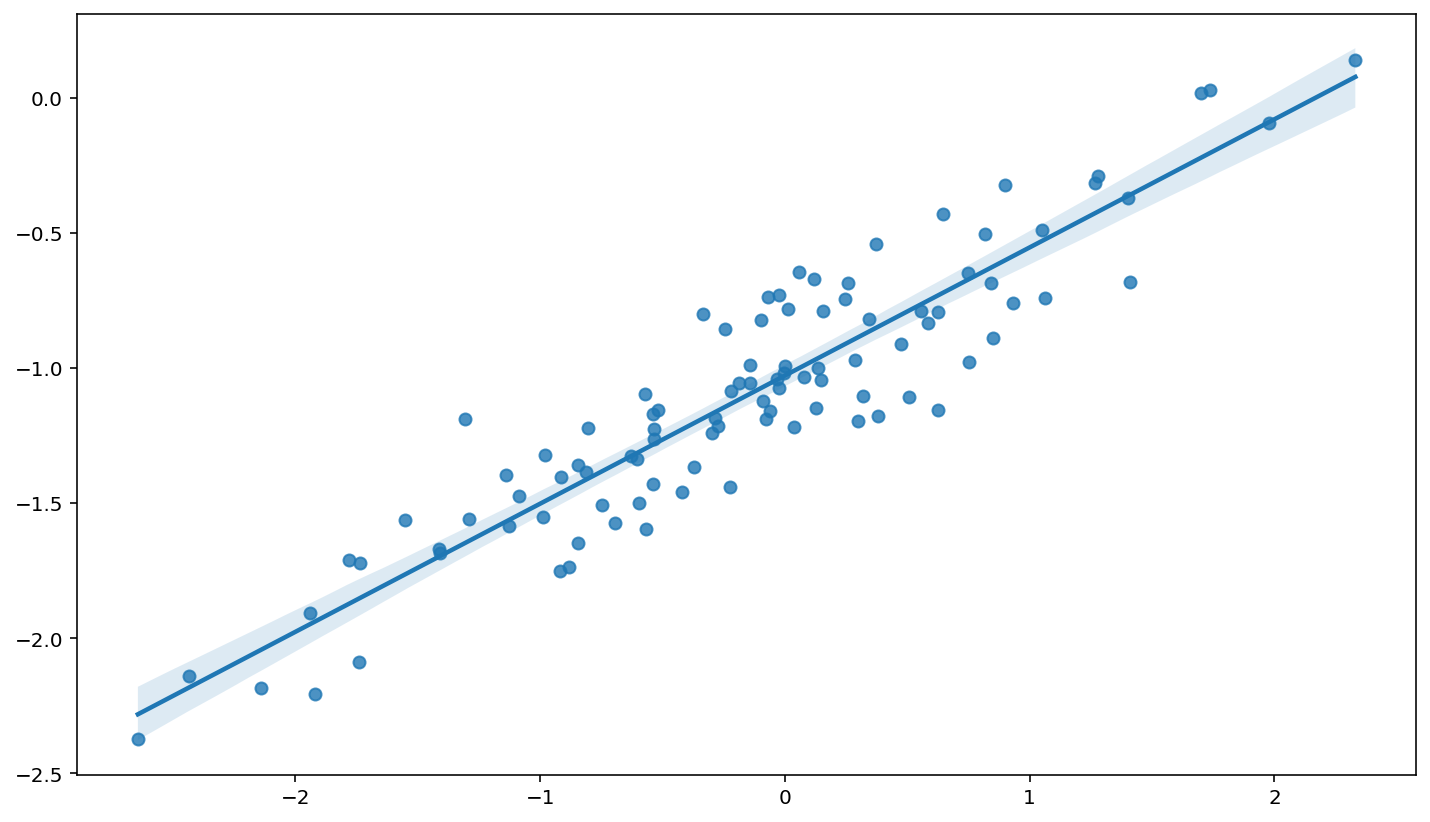

In [20]:
#How can two line be plotted?
ax = sns.regplot(x=x, y=y, data=df)

## Task F5: Quadratic Term

Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit?

In [14]:
degree = 3
weights = np.polyfit(x,y,degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)',data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     559.8
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           2.64e-42
Time:                        11:17:48   Log-Likelihood:                 25.053
No. Observations:                 100   AIC:                            -46.11
Df Residuals:                      98   BIC:                            -40.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.443e-15      0.051   2.86e-14      1.000      -0.100       0.100
model(x)       1.0000      0.042     23.661      0.000       0.916       1.084
==============================================================================
Omnibus:                        2.179   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.559
Skew:                           0.076   Prob(JB):                        0.459
Kurtosis:                       2.407   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>The linear model performs better that the polynomial one</strong>